In [1]:
import cv2
import json
import requests
import numpy as np
import pandas as pd
from PIL import Image
from io import BytesIO
import urllib.request
import xml.etree.ElementTree as ET

import scipy.io

#### Carregando os metadados

In [9]:
annotations =  scipy.io.loadmat('annotations/attrann.mat')

bboxes = annotations['attrann']['bboxes']
images = annotations['attrann']['images']
attributes = annotations['attrann']['attributes']
labels = annotations['attrann']['labels']

#bboxes[0][0][1][0]

j = 50
images[0][0][j][0][0]

'n01693334_10028'

In [3]:
def load_image_with_bounding_boxes(image_path, wnid, image_id):
            
    img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    
    idx = get_image_index(wnid, image_id)
        
    x1,x2,y1,y2 = get_bound_box(idx, img)
            
    img = cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    
    attr = get_attributes(idx)
    
    str_attr = ", ".join(get_attributes(idx))
    
    w, h = cv_size(img)
      
    cv2.putText(img, str_attr, (10, h-10), cv2.FONT_HERSHEY_SIMPLEX, 1,(0,255,255), 2, cv2.LINE_AA)
        
    return Image.fromarray(img)

def get_image_index( wnid, image_id):
    i = -1
    for img in images[0][0]:
        i = i + 1
        if "{0}_{1}".format(wnid, image_id) == img[0][0]:
            return i
        
    return -1

def cv_size(img):
    return tuple(img.shape[1::-1])

def get_bound_box(idx, img):
    img_bbox = bboxes[0][0][idx][0]
            
    xmin = img_bbox[0][0][0]
    xmax = img_bbox[1][0][0]
    ymin = img_bbox[2][0][0]
    ymax = img_bbox[3][0][0]
        
    w, h = cv_size(img)
    
    x1 = int(xmin*w)
    x2 = int(xmax*w)
    y1 = int(ymin*h)
    y2 = int(ymax*h)
    
    return x1, x2, y1, y2

def get_attributes(idx):
    i = 0
    attr = []
    for l in labels[0][0][idx]:
        if(l == 1):
            attr.append(attributes[0][0][0][i][0])
        i = i + 1
    return attr

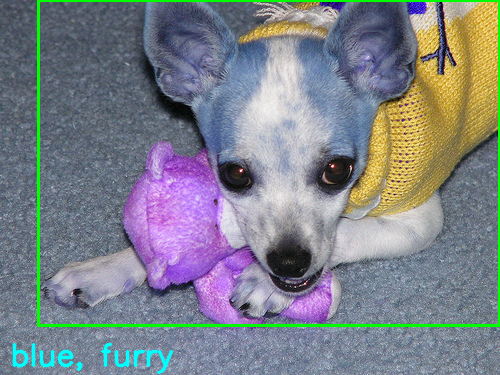

In [4]:
load_image_with_bounding_boxes("images/2111388821_a0eee8d4a0.jpg", "n01322604", "10013")

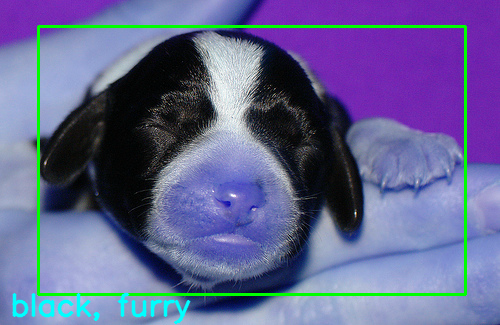

In [5]:
load_image_with_bounding_boxes("images/325576619_dae96e1488.jpg", "n01322604", "10275")

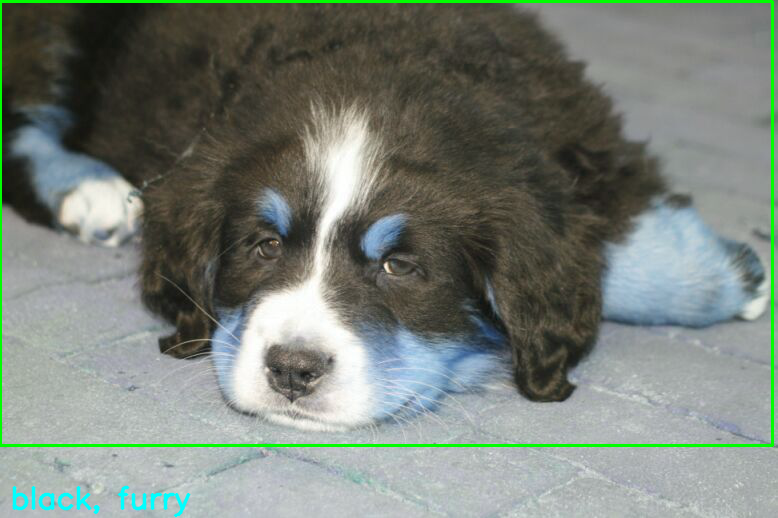

In [6]:
load_image_with_bounding_boxes("images/pup_liggen.jpg", "n01322604", "10456")

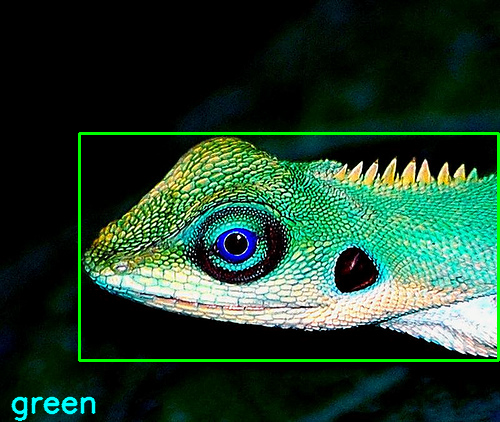

In [8]:
load_image_with_bounding_boxes("images/2558478796_a71d3afcaa.jpg", "n01693334", "10028")

In [3]:
data = pd.read_csv('data/annotations.txt', header=None, names=["img_id", "wnid", "url", "filename", "attributes"])  
data.head(5)

,img_id,wnid,url,filename,attributes
n01322604_10013,n01322604,\N,\N,blue\,furry
n01322604_10275,n01322604,\N,\N,black\,furry
n01322604_10456,n01322604,\N,\N,black\,furry
n01322604_10703,n01322604,\N,\N,black\,furry
n01322604_10716,n01322604,\N,\N,black\,furry\


In [6]:
df = pd.read_csv('annotations/winter11_urls.txt', header=None, names=["img_id", "url"], sep="\s")
df.head()

,img_id,url
0,n00007846_41,http://static.flickr.com/3423/3788747850_c9653...
1,n00007846_383,http://secrets-of-flirting.com/girlfriend.jpg
2,n00007846_499,http://z.about.com/d/kidstvmovies/1/0/a/8/sm30...
3,n00007846_543,http://static.flickr.com/3455/3372482944_244c2...
4,n00007846_612,http://static.flickr.com/3592/3376795744_e89f4...


In [20]:
index = df.loc[ df['img_id'] == 'n01322604_10456']
index['url'].values[0]

'http://berner-bunch.digi.nl/puppies/pup_liggen.jpg'